In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1

In [2]:
class GCL:
    """Generador Lineal Congruente

    atributos:
     m: el modulo
     a: el multiplicador
     c: el incremento
     xn: ultimo valor generado
    """

    def __init__(self, m, a, c, x0):
        self.m = m
        self.a = a
        self.c = c
        self.xn = x0

    def generar_numero_aleatorio(self):
        self.xn = (self.a * self.xn + self.c) % self.m
        return self.xn

In [3]:
m = 2**32
a = 1013904223
c = 1664525

padrones = [93272, 92028, 79979, 96749]
x0 = int(sum(padrones)/len(padrones))

## 1.a

In [4]:
def generar_secuencia(secuencia_largo):
    gcl = GCL(m, a, c, x0)
    secuencia = []
    for i in range(secuencia_largo):
        secuencia.append(gcl.generar_numero_aleatorio())

    return secuencia

tam_muestra = 10
primeros_diez = generar_secuencia(tam_muestra)
print(primeros_diez)

[3454896546, 8404779, 606119938, 277718219, 4216340066, 875795051, 1362250946, 1409026059, 1862062882, 3706783147]


## 1.b

In [5]:
class GCL_01(GCL):
    """Generador Lineal Congruente con distribucion [0, 1]
    """

    def generar_numero_aleatorio(self):
        return super().generar_numero_aleatorio()/m

## 1.c

In [6]:
def generar_secuencia(secuencia_largo):
    gcl = GCL_01(m, a, c, x0)
    secuencia = []
    for i in range(secuencia_largo):
        secuencia.append(gcl.generar_numero_aleatorio())

    return secuencia

tam_muestra = 100000
muestra = generar_secuencia(tam_muestra)

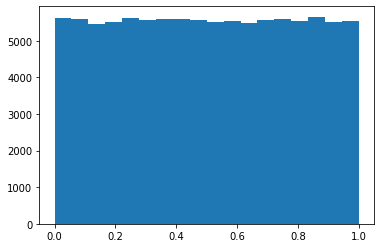

In [7]:
plt.hist(muestra, 'sturges')
plt.show()

# Ejercicio 2

## 2.a

In [8]:
from math import exp

In [9]:
def f(t):
    lambda_ = 1/15
    if t >= 0 and t < 10:
        return 1/25
    elif t >= 10:
        return 3/5 * lambda_ * exp(-1 * lambda_ * (t - 10))

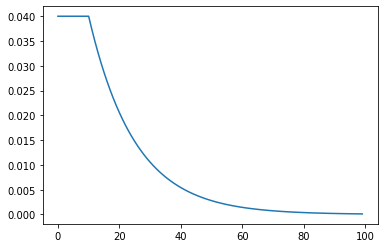

In [10]:
x = np.arange(0.0, 100.0, 1)
y = np.array(list(map(f, x)))

plt.plot(x, y)
plt.show()

## 2.b

In [11]:
def F(t):
    lambda_ = 1/15
    if t >= 0 and t < 10:
        return 10/25
    elif t >= 10:
        return (10/25) + (3/5) - (3/5) * exp(-1 * lambda_ * (t - 10))

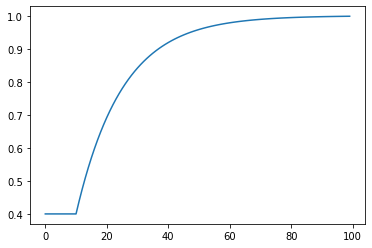

In [12]:
x = np.arange(0.0, 100.0, 1)
y = np.array(list(map(F, x)))

plt.plot(x, y)
plt.show()

In [13]:
from math import log

In [14]:
def F_inversa(t):
    lambda_ = 1/15
    return (-1/lambda_) * log( (5/3) - (5/3) * t) + 10

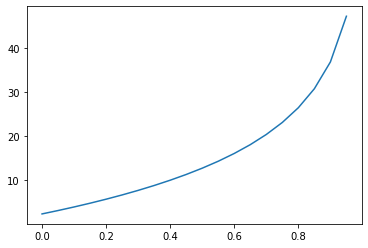

In [15]:
x = np.arange(0.0, 1.0, 0.05)
y = np.array(list(map(F_inversa, x)))

plt.plot(x, y)
plt.show()

## 2.c y 2.d

In [16]:
tam_muestra = 100000
# muestra de numeros aleatorios con distrib uniforme [0, 1]
muestra = generar_secuencia(tam_muestra)

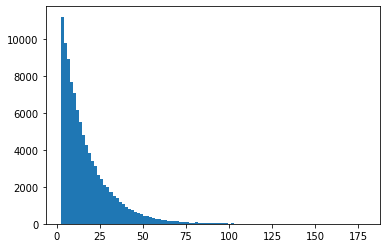

In [17]:
y = np.array(list(map(F_inversa, muestra)))

plt.hist(y, 100)
plt.show()

# Ejercicio 3

Para el metodo de aceptacion y rechazo se debe usar una fY() conocida que tenga el mismo dominio que la fX() que se quiere generar.

 En este caso fX() es una normal de media 15 y desvio 3, como nosotros sabemos aproximar la normal estandar con una exponencial de media 1 podemos usar los valores de esa muestra sabiendo que:
 
 Z = $\frac{X - \mu}{\sigma}$
 
 siendo que X sigue una distribucion N($\mu, \sigma$) y Z una N(0, 1). Como nosotros queremos X, la despejamos:
 
 X = $ Z * \sigma + \mu $
 
 

## 3.a

In [18]:
# con 0 < t < infinito (por eso el 2 en el numerador)
def normal_estandar(t):
    return 2/(np.sqrt(2 * np.pi)) * np.exp( -1*(t)**2 / 2 )

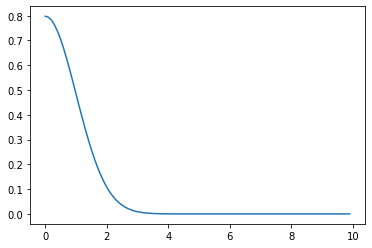

In [19]:
x = np.arange(0, 10, 0.1)
y = np.array(list(map(normal_estandar, x)))

plt.plot(x, y)
plt.show()

In [20]:
def exponencial(t, media=1):
    return media * exp(-1*media*t)

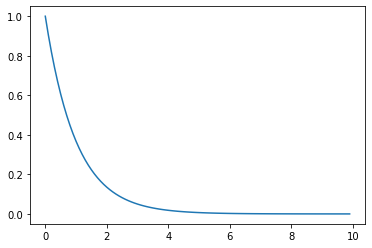

In [21]:
x = np.arange(0, 10, 0.1)
y = np.array(list(map(exponencial, x)))

plt.plot(x, y)
plt.show()

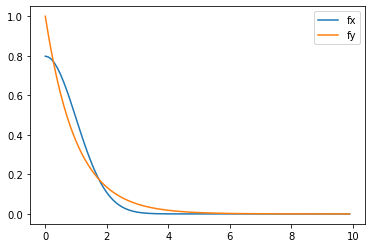

In [22]:
# comparo la distribucion normal estandar y la exponencial de media 1
x1 = np.arange(0, 10, 0.1)
y1 = np.array(list(map(normal_estandar, x1)))

y2 = np.array(list(map(exponencial, x1)))

plt.plot(x1, y1, label='fx')
plt.plot(x1, y2, label='fy')
plt.legend()
plt.show()

In [23]:
from random import random

media, desvio_estandar = 15, 3
tam_muestra = 100000

c = np.sqrt(2 * np.e / np.pi)

muestra = []
for i in range(tam_muestra):
    # genero muestras de la variable exponencial de media 1
    u1 = np.random.exponential(1, 1)[0]
    u2 = random()

    if( u2 < normal_estandar(u1)/(c*exponencial(u1, media=1)) ):
        # u3 para decidir si el valor es negativo o positivo
        u3 = random()
        if u3 <= 0.5:
            z = u1 
        else:
            z = -u1
        # para obtener un valor para la normal con media=15 y desvio=3, a la variable de la normal estandar
        # la multiplico por el devio y le sumo la media
        x = desvio_estandar * z + media
        muestra.append(x)


76037

## 3.b

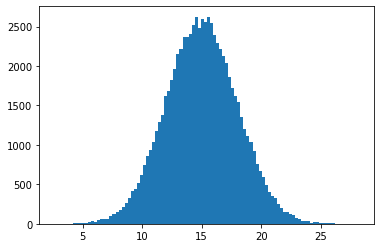

In [24]:
plt.hist(muestra, 100)
plt.show()

## 3.c

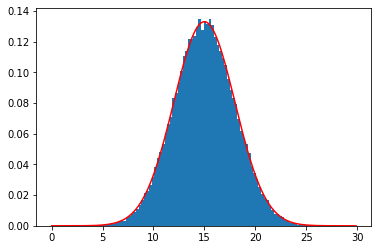

In [25]:
from scipy.stats import norm

x = np.arange(0, 30, 0.1)

plt.plot(x, norm.pdf(x, media, desvio_estandar), color='r')
plt.hist(muestra, 100, density=True)
plt.show()

## 3.d

In [26]:
# media de la muestra
media_muestra = np.mean(muestra)
print('Media de la muestra:', media_muestra)
print('Diferencia hasta la media teorica:', media - media_muestra)

Media de la muestra: 15.001745489792496
Diferencia hasta la media teorica: -0.0017454897924960022


In [27]:
# desvio estandar de la muestra
muestra_desvio_standar = np.std(muestra)
print('Desvio estandar de la muestra:', muestra_desvio_standar)
print('Diferencia hasta el devio estandar teorico:', desvio_estandar - muestra_desvio_standar)

Desvio estandar de la muestra: 2.9977254348748743
Diferencia hasta el devio estandar teorico: 0.0022745651251256938


## 3.e

In [30]:
factor_rendimiento = len(muestra) / tam_muestra * 100
print('Factor de rendimiento:', factor_rendimiento, '%')

Factor de rendimiento: 76.037 %


# Ejercicio 4

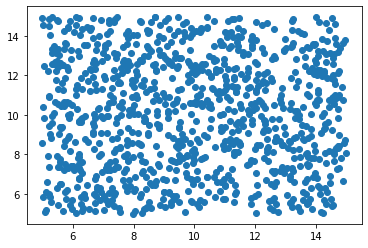

In [34]:
tam_muestra = 1000

u1 = np.random.uniform(0, 1, tam_muestra)
u2 = np.random.uniform(0, 1, tam_muestra)

u1 = u1 * 10 +5
u2 = u2 * 10 +5

plt.scatter(u1, u2)
plt.show()

# Ejercicio 5

In [35]:
tam_muestra = 100000

u1 = np.random.uniform(0, 1, tam_muestra)
u2 = np.random.uniform(0, 1, tam_muestra)

z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

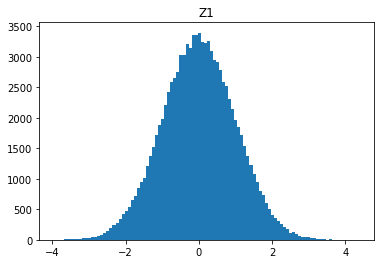

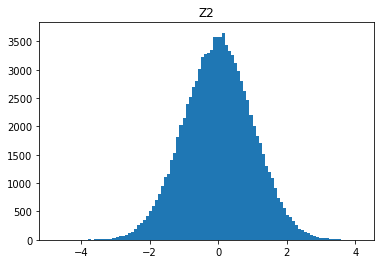

In [36]:
plt.hist(z1, 100)
plt.title('Z1')
plt.show()

plt.hist(z2, 100)
plt.title('Z2')
plt.show()

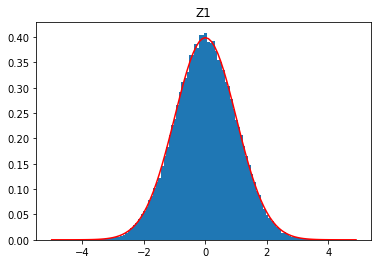

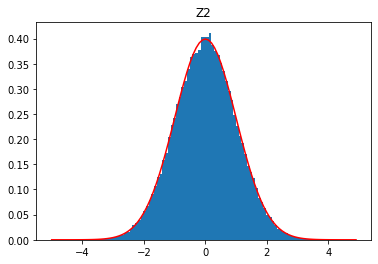

In [37]:
# comparo las normales estandar generadas con la generado por scipy
x = np.arange(-5, 5, 0.1)

plt.plot(x, norm.pdf(x, 0, 1), color='r')
plt.hist(z1, 100, density=True)
plt.title('Z1')
plt.show()

plt.plot(x, norm.pdf(x, 0, 1), color='r')
plt.hist(z2, 100, density=True)
plt.title('Z2')
plt.show()

In [42]:
# Calculo la media y varianza de la distribución obtenida y la comparo contra los valores teóricos.
media_teorica = 0
desvio_estandar_teorico = 1

# Para z1
media_muestra = np.mean(z1)
print('Media de la muestra z1:', media_muestra)
print('Diferencia hasta la media teorica:', media_teorica - media_muestra)
print('')

muestra_desvio_estandar = np.std(z1)
print('Desvio estandar de la muestra z1:', muestra_desvio_estandar)
print('Diferencia hasta el devio estandar teorico:', desvio_estandar_teorico - muestra_desvio_estandar)
print('')

# Para z2
media_muestra = np.mean(z2)
print('Media de la muestra z2:', media_muestra)
print('Diferencia hasta la media teorica:', media_teorica - media_muestra)
print('')

muestra_desvio_estandar = np.std(z2)
print('Desvio estandar de la muestra z2:', muestra_desvio_estandar)
print('Diferencia hasta el devio estandar teorico:', desvio_estandar_teorico - muestra_desvio_estandar)
print('')

Media de la muestra z1: 0.0019617613899299263
Diferencia hasta la media teorica: -0.0019617613899299263

Desvio estandar de la muestra z1: 0.9972186938143919
Diferencia hasta el devio estandar teorico: 0.0027813061856081234

Media de la muestra z2: 0.001029852063934228
Diferencia hasta la media teorica: -0.001029852063934228

Desvio estandar de la muestra z2: 0.9998980364700659
Diferencia hasta el devio estandar teorico: 0.00010196352993407931



# Ejercicio 6

## 6.a

In [44]:
m = 2**32
a = 1013904223
c = 1664525

padrones = [93272, 92028, 79979, 96749]
x0 = int(sum(padrones)/len(padrones))


tam_muestra = 100000
muestra = []

gcl = GCL_01(m, a, c, x0)
for i in range(tam_muestra):
    u = gcl.generar_numero_aleatorio()
    if u >= 0 and u <= 0.1:
        muestra.append('A')
    elif u > 0.1 and u <= 0.6:
        muestra.append('B')
    elif u > 0.6 and u <= 0.9:
        muestra.append('C')
    elif u > 0.9 and u <= 1:
        muestra.append('D')

## 6.b

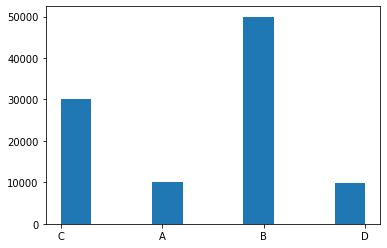

In [48]:
plt.hist(muestra)
plt.show()